## Import Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Load Dataset

In [6]:
df = pd.read_csv('../data/matches.csv', encoding='latin1')

## Preview the data

In [11]:
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset info:")
print(df.info())


First 5 rows of the dataset:


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        828

### Create a new column 'Result' for match outcomes

In [12]:
def get_result(row):
    if row['FTHG'] > row['FTAG']:
        return 'HomeWin'
    elif row['FTHG'] < row['FTAG']:
        return 'AwayWin'
    else:
        return 'Draw'

df['Result'] = df.apply(get_result, axis=1)

### Show Counts of Match Results

In [13]:
print("\nCounts of match results:")
print(df['Result'].value_counts())


Counts of match results:
Result
HomeWin    5088
AwayWin    3161
Draw       2864
Name: count, dtype: int64


### Plot Distribution of match results

C:\Users\Admin\AppData\Local\Temp\ipykernel_7972\1528520346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette='pastel')


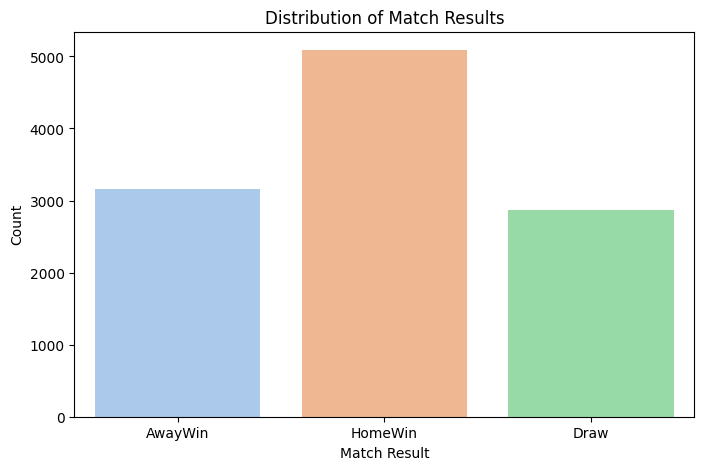

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Result', data=df, palette='pastel')
plt.title('Distribution of Match Results')
plt.xlabel('Match Result')
plt.ylabel('Count')
plt.show()

### Plot Distribution of goals scored by Home and Away Teams

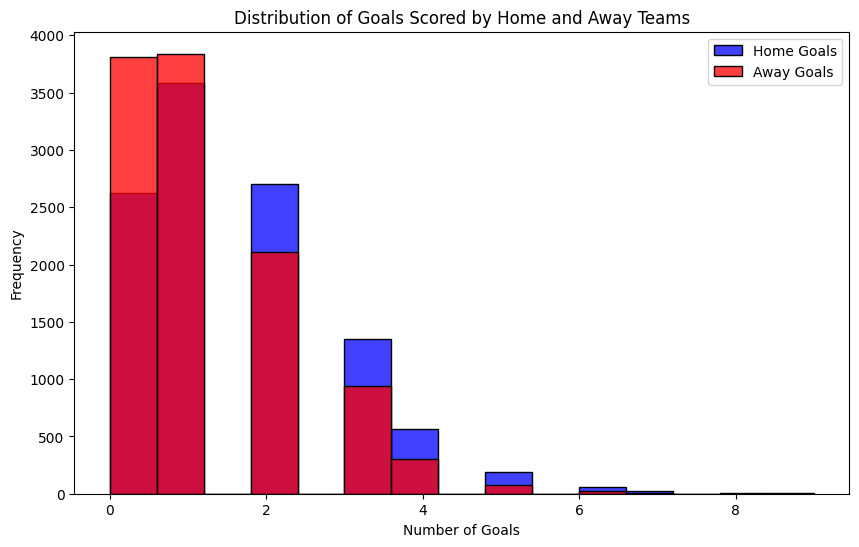

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FTHG'], bins=15, color='blue', label='Home Goals', kde=False)
sns.histplot(df['FTAG'], bins=15, color='red', label='Away Goals', kde=False)
plt.legend()
plt.title('Distribution of Goals Scored by Home and Away Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.show()

### Average goals scored per Team(Home and Away)

In [16]:
avg_home_goals = df.groupby('HomeTeam')['FTHG'].mean().sort_values(ascending=False)
avg_away_goals = df.groupby('AwayTeam')['FTAG'].mean().sort_values(ascending=False)

print("\nTop 5 Teams by Average Home Goals Scored:")
print(avg_home_goals.head())

print("\nTop 5 Teams by Average Away Goals Scored:")
print(avg_away_goals.head())


Top 5 Teams by Average Home Goals Scored:
HomeTeam
Man United    2.115942
Arsenal       2.027174
Liverpool     2.005445
Man City      1.997807
Chelsea       1.970909
Name: FTHG, dtype: float64

Top 5 Teams by Average Away Goals Scored:
AwayTeam
Man United    1.709619
Arsenal       1.530909
Liverpool     1.519928
Chelsea       1.496377
Man City      1.452954
Name: FTAG, dtype: float64


### Plot Top 5 Teams by Average Home Goals

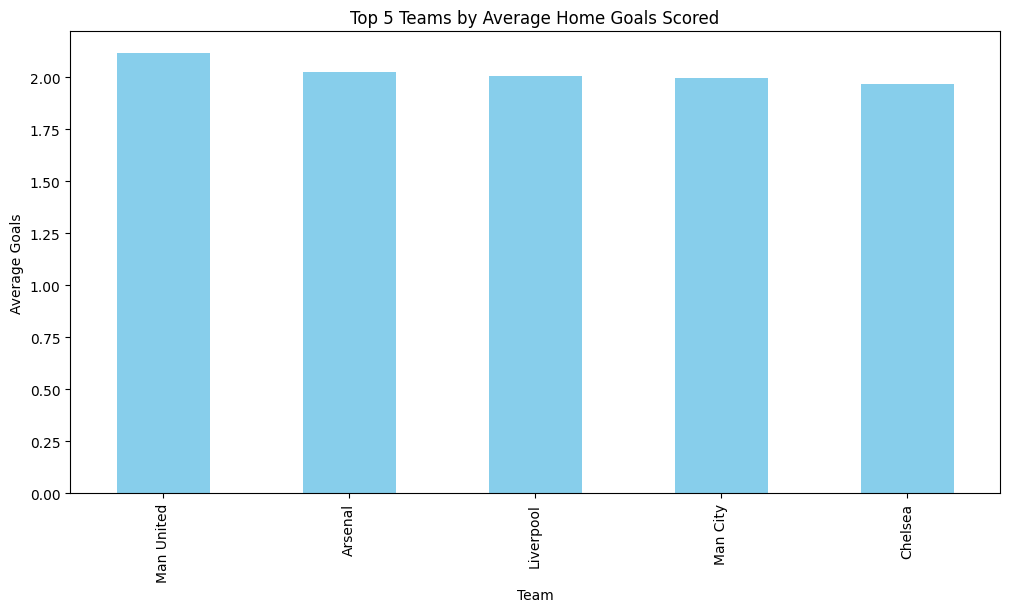

In [17]:
plt.figure(figsize=(12,6))
avg_home_goals.head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Teams by Average Home Goals Scored')
plt.ylabel('Average Goals')
plt.xlabel('Team')
plt.show()

### Plot Top 5 Teams by Average Away Goals

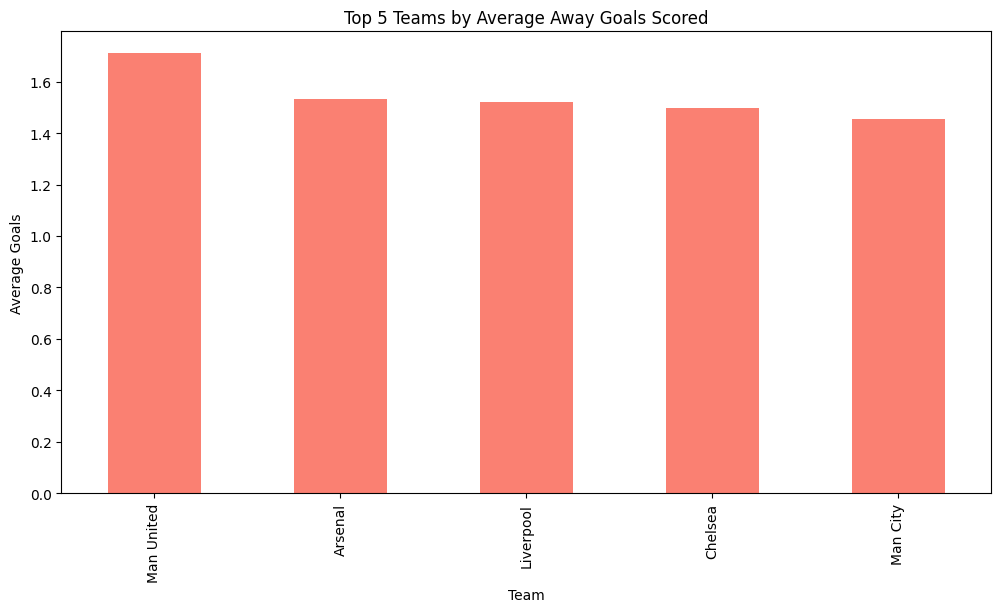

In [18]:
plt.figure(figsize=(12,6))
avg_away_goals.head(5).plot(kind='bar', color='salmon')
plt.title('Top 5 Teams by Average Away Goals Scored')
plt.ylabel('Average Goals')
plt.xlabel('Team')
plt.show()

## Pre-processing

### Create a target column for Match Result

In [20]:
df['Result'] = df['FTR'].map({'H': 'HomeWin', 'D': 'Draw', 'A': 'AwayWin'})
le = LabelEncoder()
df['ResultEncoded'] = le.fit_transform(df['Result'])

### Select Features

In [21]:
features = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
X = df[features]
y = df['ResultEncoded']

### Split data into Training and Testing Sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions

In [24]:
y_pred = model.predict(X_test)

### Evaluation

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5933423301844355
              precision    recall  f1-score   support

     AwayWin       0.64      0.58      0.61       641
        Draw       0.38      0.24      0.30       574
     HomeWin       0.63      0.80      0.71      1008

    accuracy                           0.59      2223
   macro avg       0.55      0.54      0.54      2223
weighted avg       0.57      0.59      0.57      2223

